In [2]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

    MNIST
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.The database is also widely used for training and testing in the field of machine learning

Using the MNIST dataset as the example, normalize the data and write a function that creates a simple Keras model for classifying the images into 10 classes.

In [3]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data() # load data set

In [4]:
len(xtrain) # number of train data

60000

In [5]:
xtrain.shape

(60000, 28, 28)

In [6]:
xtrain[0].shape # image size according to pixel

(28, 28)

In [7]:
xtrain[0]# getting each pixel's value between 0-255 of zero index image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<Figure size 720x576 with 0 Axes>

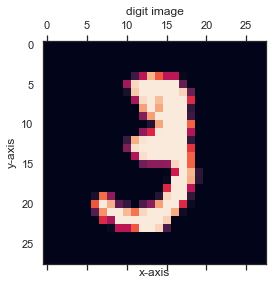

In [8]:
sns.set(style='white')
plt.figure(figsize=(10,8))
plt.matshow(xtrain[10]) # showing an image
plt.title('digit image')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

In [9]:
ytrain[1]

0

In [10]:
xtrain[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [11]:
xtrain=xtrain/255 # convert all pixels values between 0 to 1 
xtest=xtest/255

# Flatten the image
flatten the image/reshape into 28*28 to 784

In [12]:
xtrain=xtrain.reshape(-1,784) # converting 2D to 1D
xtest=xtest.reshape(-1,784)

In [13]:
xtrain_flattened=xtrain.reshape(len(xtrain),28*28) # converting 2D to 1D
xtrain_flattened.shape

(60000, 784)

In [14]:
xtest_flattened=xtest.reshape(len(xtest),28*28) # converting 2D to 1D
xtest_flattened.shape

(10000, 784)

In [15]:
xtrain_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
model=keras.Sequential([ # loding the model
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid') # here 10 = output shape/nouron

])

Scaling is a technique which increase the accuracy of model

In [17]:
model.compile(                     # evaluating accuracy of train dataset
    optimizer='adam',
    loss='SparseCategoricalCrossentropy', # Computes the crossentropy loss between the labels and predictions.
    metrics=['accuracy']
)
model.fit(xtrain_flattened, ytrain, epochs=5) # train the model | epoche=5 number of iteration

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4701 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3039 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2832 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2730 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2667 - accuracy: 0.9260


In [18]:
model.evaluate(xtest_flattened,ytest)  # evaluating accuracy of test dataset

313/313 [==============================] - 1s 3ms/step - loss: 0.2680 - accuracy: 0.9249


[0.2679723799228668, 0.9248999953269958]

| Xtest prediction |

In [19]:
y_predict=model.predict(xtest_flattened)  # xtest predicted
y_predict

313/313 [==============================] - 1s 3ms/step


array([[2.09347829e-02, 2.98813148e-07, 6.99743778e-02, ...,
        9.99801278e-01, 1.06688328e-01, 6.52075231e-01],
       [4.89671916e-01, 5.64346323e-03, 9.99053955e-01, ...,
        7.38409063e-13, 8.65985379e-02, 2.93609070e-09],
       [3.63167957e-04, 9.92580771e-01, 6.66973174e-01, ...,
        1.15009114e-01, 3.90501827e-01, 5.13063483e-02],
       ...,
       [4.27848227e-06, 3.36248149e-06, 1.63874950e-03, ...,
        2.05389917e-01, 5.94339311e-01, 7.89705992e-01],
       [9.68360546e-05, 1.20797689e-04, 1.29762033e-04, ...,
        3.07791524e-05, 5.92660546e-01, 8.94107870e-05],
       [6.57859305e-03, 3.83596876e-10, 1.46241784e-01, ...,
        8.20537149e-09, 2.68585252e-04, 7.92134017e-07]], dtype=float32)

In [20]:
y_predict[0] # approximate all prediction value of zero index

array([2.09347829e-02, 2.98813148e-07, 6.99743778e-02, 9.45866704e-01,
       2.46917503e-03, 1.05312325e-01, 1.91579193e-06, 9.99801278e-01,
       1.06688328e-01, 6.52075231e-01], dtype=float32)

ndarray.argmax, argmin
amax : The maximum value along a given axis.
argmax() returns the indices of the maximum values along an axis.


In [65]:
np.argmax(y_predict[0]) # printing the prediction value | 


7

In [66]:
y_predict_labels=[np.argmax(i) for i in y_predict] # iterating prediction values 
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
ytest[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

| Xtrain prediction |

In [24]:
x_predict=model.predict(xtrain_flattened)  # xtest predicted
x_predict

1875/1875 [==============================] - 5s 3ms/step


array([[2.2709755e-02, 8.5631349e-05, 6.7383066e-02, ..., 4.8704669e-02,
        2.2748062e-02, 1.5990658e-02],
       [9.9983376e-01, 1.1529805e-07, 7.8391820e-02, ..., 1.2182246e-03,
        5.3592280e-02, 2.6512846e-02],
       [9.9899608e-04, 1.1258826e-04, 2.6101297e-01, ..., 1.0821070e-01,
        2.0469675e-02, 9.1398127e-02],
       ...,
       [1.0542084e-02, 4.0766257e-03, 6.6246535e-04, ..., 9.6097350e-04,
        7.2044629e-01, 3.0873220e-02],
       [5.0567787e-02, 1.7673947e-05, 5.2065004e-02, ..., 6.9730770e-04,
        1.2246514e-03, 2.4846357e-03],
       [4.5556170e-01, 1.6157490e-05, 2.5337467e-02, ..., 1.9563176e-03,
        9.0372115e-01, 2.8806332e-01]], dtype=float32)

In [25]:
np.argmax(x_predict[0])

5

In [26]:
ytrain[0]

5

# Cnfusion Matrix

In [27]:
cm=tf.math.confusion_matrix(labels=ytest,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   7,    9,  918,   20,    9,    2,   10,   10,   44,    3],
       [   3,    0,   19,  913,    1,   27,    1,   12,   24,   10],
       [   2,    1,    6,    1,  928,    0,    5,    3,    9,   27],
       [  11,    3,    5,   33,   11,  779,    8,    4,   31,    7],
       [  14,    3,   11,    1,   10,   17,  898,    2,    2,    0],
       [   2,    5,   22,    8,    9,    0,    0,  944,    2,   36],
       [   6,    7,    6,   16,    9,   25,    7,    9,  882,    7],
       [  10,    7,    1,    9,   35,    7,    0,   18,    9,  913]])>

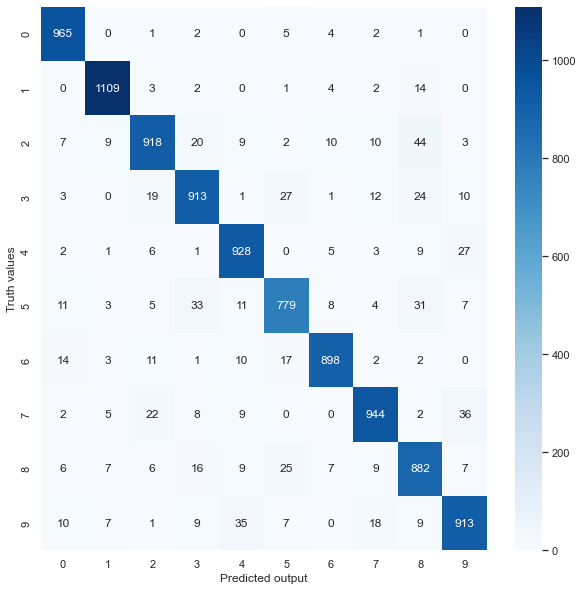

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted output')
plt.ylabel('Truth values')
plt.show()

Note: diagonally values are correct prediction but all other false prediction

# Adding hidden layers

In [29]:
model_1=keras.Sequential([ # loding the model
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), # here 100 = numver shape/nouron of hidden layer which is not fixed
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='softmax') # it is output layer | we can add more hidden layers
])

In [30]:
model_1.compile(                     # evaluating accuracy of train dataset
    optimizer='adam',
    loss='SparseCategoricalCrossentropy', # Computes the crossentropy loss between the labels and predictions.
    metrics=['accuracy']
)
model_1.fit(xtrain_flattened, ytrain, epochs=5) # train the model | epoche=5 number of iteration

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2397 - accuracy: 0.9294
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1041 - accuracy: 0.9682
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0727 - accuracy: 0.9777
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0560 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0452 - accuracy: 0.9851


In [31]:
model_1.evaluate(xtest_flattened,ytest)  # evaluating accuracy of test dataset

313/313 [==============================] - 2s 4ms/step - loss: 0.0845 - accuracy: 0.9744


[0.08446574956178665, 0.974399983882904]

In [32]:
y_predict=model_1.predict(xtest_flattened)  # xtest predicted
y_predict

313/313 [==============================] - 1s 3ms/step


array([[2.36415673e-07, 3.01411589e-08, 5.90506261e-06, ...,
        9.99978065e-01, 3.09945079e-07, 8.88496686e-07],
       [9.11515169e-11, 1.06140997e-05, 9.99988437e-01, ...,
        2.29721244e-13, 3.41361996e-08, 1.55715813e-13],
       [3.01646352e-08, 9.99799073e-01, 9.39083111e-06, ...,
        3.42268213e-05, 1.17718184e-04, 1.38055370e-07],
       ...,
       [5.01052311e-14, 8.33134776e-12, 1.47317436e-10, ...,
        1.05345896e-06, 1.79098780e-08, 8.53112965e-07],
       [4.14196997e-08, 5.11077347e-10, 2.64963216e-08, ...,
        4.66131638e-07, 1.87565386e-02, 4.39707090e-11],
       [1.03543996e-11, 1.20651863e-10, 1.42740014e-10, ...,
        1.51295822e-14, 4.68961588e-12, 7.65401371e-12]], dtype=float32)

In [33]:
y_predict_labels=[np.argmax(i) for i in y_predict] # iterating prediction values 
y_predict_labels[:5]

[7, 2, 1, 0, 4]

# cofusion matrix of hidden layer

In [34]:
cm_didden=tf.math.confusion_matrix(labels=ytest,predictions=y_predict_labels)
cm_didden

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    0,    2,    0,    4,    0,    2,    2],
       [   0, 1119,    5,    1,    0,    0,    2,    0,    8,    0],
       [   4,    1, 1015,    0,    0,    0,    5,    4,    3,    0],
       [   0,    0,    6,  994,    1,    1,    0,    4,    4,    0],
       [   0,    0,    2,    0,  968,    0,    2,    1,    0,    9],
       [   3,    0,    0,   23,    2,  832,    9,    2,   15,    6],
       [   1,    3,    0,    1,    2,    3,  947,    0,    1,    0],
       [   2,    8,   16,    2,    3,    0,    0,  984,    6,    7],
       [   3,    0,    5,    5,    2,    1,    8,    3,  945,    2],
       [   4,    1,    1,    3,   12,    0,    0,    6,   11,  971]])>

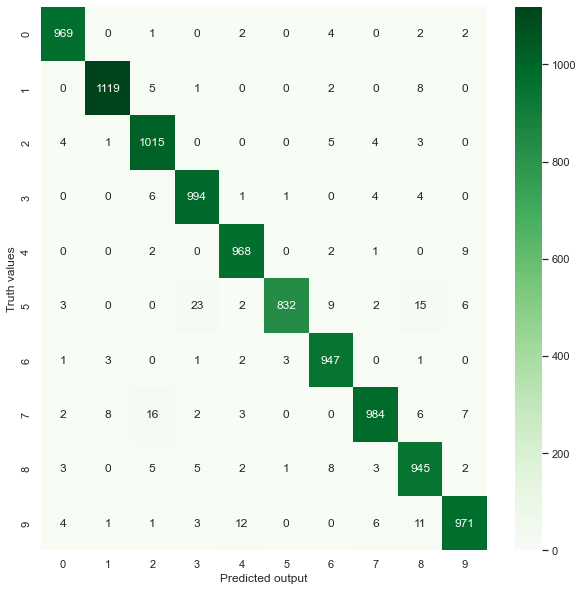

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_didden, annot=True,fmt='d',cmap='Greens')
plt.xlabel('Predicted output')
plt.ylabel('Truth values')
plt.show()

# Auto Flatten

In [36]:
model_2=keras.Sequential([ # loding the model
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'), # here 100 = numver shape/nouron of hidden layer which is not fixed
    keras.layers.Dense(10,activation='sigmoid') # it is output layer | we can add more hidden layers
])

In [37]:
model_2.compile(                     # evaluating accuracy of train dataset
    optimizer='adam',
    loss='SparseCategoricalCrossentropy', # Computes the crossentropy loss between the labels and predictions.
    metrics=['accuracy']
)
model_2.fit(xtrain, ytrain, epochs=5)

Epoch 1/5


ValueError: in user code:

    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\Python310\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "c:\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Python310\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 28, 28), found shape=(32, 784)
